In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import scipy as sp
from scipy import ndimage

In [102]:
IMG_DEFAULT1 = "../static/bl2049_small.jpg"
IMG_DEFAULT2 = "../static/captcha.jpg"
IMG_DEFAULT3 = "../static/bird_small.jpg"
IMG_DEFAULT4 = "../static/bp.jpg"
IMG_DEFAULT5 = "../static/captcha2.jpg"
IMG_DEFAULT6 = "../static/bs_small.jpg"

In [103]:
def get_gray_img(source):
    img = cv2.imread(source)
    g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return g_img

In [104]:
img1 = cv2.cvtColor(cv2.imread(IMG_DEFAULT1), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread(IMG_DEFAULT2), cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(cv2.imread(IMG_DEFAULT3), cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(cv2.imread(IMG_DEFAULT4), cv2.COLOR_BGR2RGB)
img5 = cv2.cvtColor(cv2.imread(IMG_DEFAULT5), cv2.COLOR_BGR2RGB)
img6 = cv2.cvtColor(cv2.imread(IMG_DEFAULT6), cv2.COLOR_BGR2RGB)

In [105]:
g_img1 = get_gray_img(source=IMG_DEFAULT1)
g_img2 = get_gray_img(source=IMG_DEFAULT2)
g_img3 = get_gray_img(source=IMG_DEFAULT3)
g_img4 = get_gray_img(source=IMG_DEFAULT4)
g_img5 = get_gray_img(source=IMG_DEFAULT5)
g_img6 = get_gray_img(source=IMG_DEFAULT6)

In [106]:
_, b_img1 = cv2.threshold(g_img1,0,255,cv2.THRESH_OTSU)
_, b_img2 = cv2.threshold(g_img2,0,255,cv2.THRESH_OTSU)
_, b_img3 = cv2.threshold(g_img3,0,255,cv2.THRESH_OTSU)
_, b_img4 = cv2.threshold(g_img4,0,255,cv2.THRESH_OTSU)
_, b_img5 = cv2.threshold(g_img5,0,255,cv2.THRESH_OTSU)
_, b_img6 = cv2.threshold(g_img6,0,255,cv2.THRESH_OTSU)

In [86]:
COLOR = (0, 255, 0)

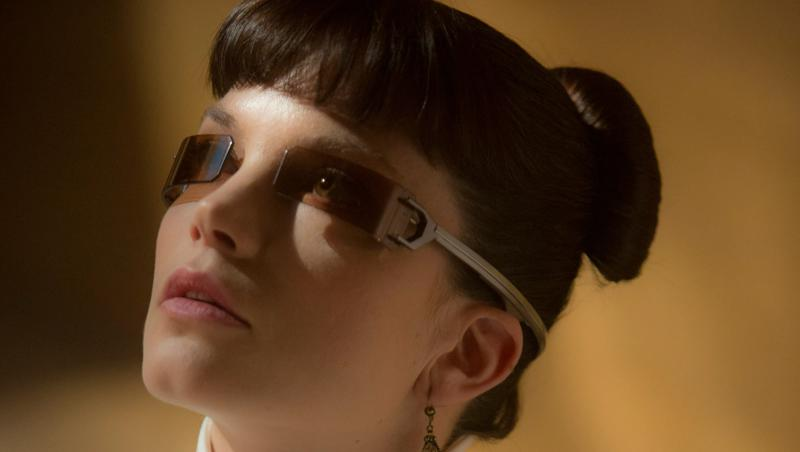

In [94]:
display(Image.fromarray(img1))

In [101]:
def moravec_detector(img_gray, img, block_size=5, threshold=300):
    r = block_size // 2
    img_gray = np.asarray(img_gray, dtype=np.float32)
    row = img_gray.shape[0]
    col = img_gray.shape[1]

    min_val = np.zeros(img_gray.shape)
    count = 0

    for y in range(r, row - r):
        for x in range(r, col - r):
            v1 = 0
            v2 = 0
            v3 = 0
            v4 = 0
            for k in range(-r, r):
                v1 += np.square(img_gray[y, x + k] - img_gray[y, x + k + 1])
                v2 += np.square(img_gray[y + k, x] - img_gray[y + k + 1, x])
                v3 += np.square(img_gray[y + k, x + k] - img_gray[y + k + 1, x + k + 1])
                v4 += np.square(img_gray[y + k, x - k] - img_gray[y + k + 1, x - k - 1])

            min_val[y, x] = min(v1, v2, v3, v4)

            if min_val[y, x] < threshold:
                min_val[y, x] = 0
            else:
                count += 1

    for i in range(block_size, row - block_size):
        for j in range(block_size, col - block_size):
            mat = min_val[i - block_size:i + block_size, j - block_size:j + block_size]
            if np.max(mat) != 0:
                pos = np.unravel_index(np.argmax(mat), mat.shape)
                corn_y = i + pos[0] - block_size
                corn_x = j + pos[1] - block_size
                cv2.circle(img, (corn_x, corn_y), 3, COLOR)

    return count, img

3197


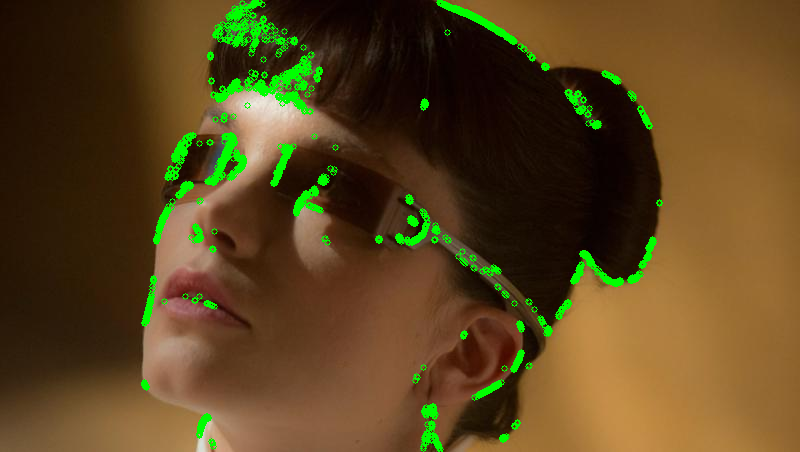

In [107]:
corners, marked_image = moravec_detector(g_img1.copy(), img1.copy())
print(corners)
display(Image.fromarray(marked_image))

In [ ]:
def harris_detector(img_gray, img):
    img_gray = np.float32(img_gray)

    dest = cv2.cornerHarris(img_gray, 2, 5, 0.07)
    thresh = 0.01 * dest.max()
    num_corners = np.sum(dest > thresh)
    dest = cv2.dilate(dest, None)

    for i in range(dest.shape[0]):
        for j in range(dest.shape[1]):
            if int(dest[i, j]) > thresh:
                cv2.circle(img, (j, i), 3, COLOR)

    return num_corners, img

33


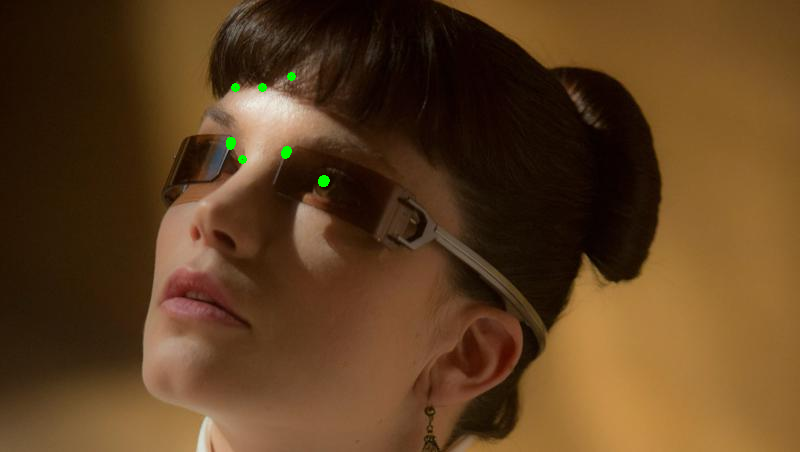

In [98]:
c, res_img2 = harris_detector(g_img1.copy(), img1.copy())
print(c)
display(Image.fromarray(res_img2))

In [112]:
def fast_detector(img_gray, img):
    fast = cv2.FastFeatureDetector_create(5, True)

    corners = fast.detect(img_gray, None)
    img = cv2.drawKeypoints(img, corners, None, color=COLOR)

    return corners, img

1959


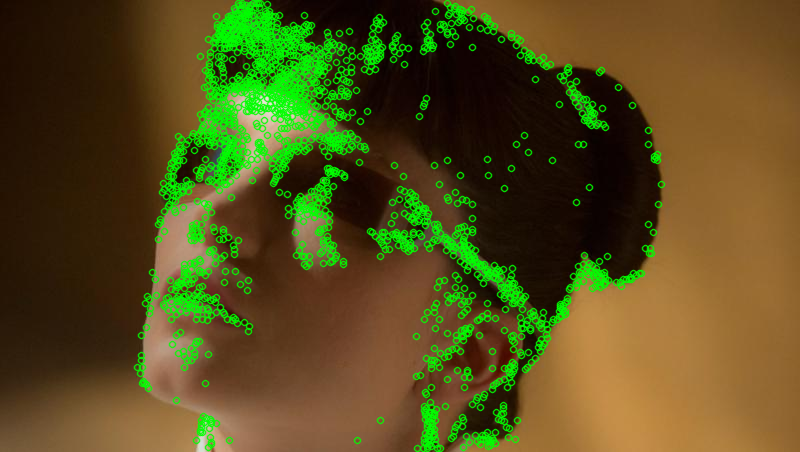

In [113]:
c3, res_img3 = fast_detector(g_img1.copy(), img1.copy())
print(len(c3))
display(Image.fromarray(res_img3))